In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/medical_insurance.csv')

print(df.columns) # Display the column names
print("\n") 
print("Available data types are:") 
print(df.dtypes) # Display the data types of each column
#print(df.head()) # Display the first 5 rows of the dataframe


df.isnull().sum() # Check for missing values


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Available data types are:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
# Exploratory Data Analysis (EDA)
# Identify the attributes that most affect medical charges
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())





               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010


In [72]:
# Correlation matrix to identify the relationship between the variables
# A value of 1 indicates a perfect positive correlation,
# a value of -1 indicates a perfect negative correlation,
# and a value of 0 indicates no correlation at all.

# correlation values for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns 
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()



In [30]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
data_encoded.head()

data_encoded.to_csv('dataset/medical_insurance_encoded.csv', index=False)


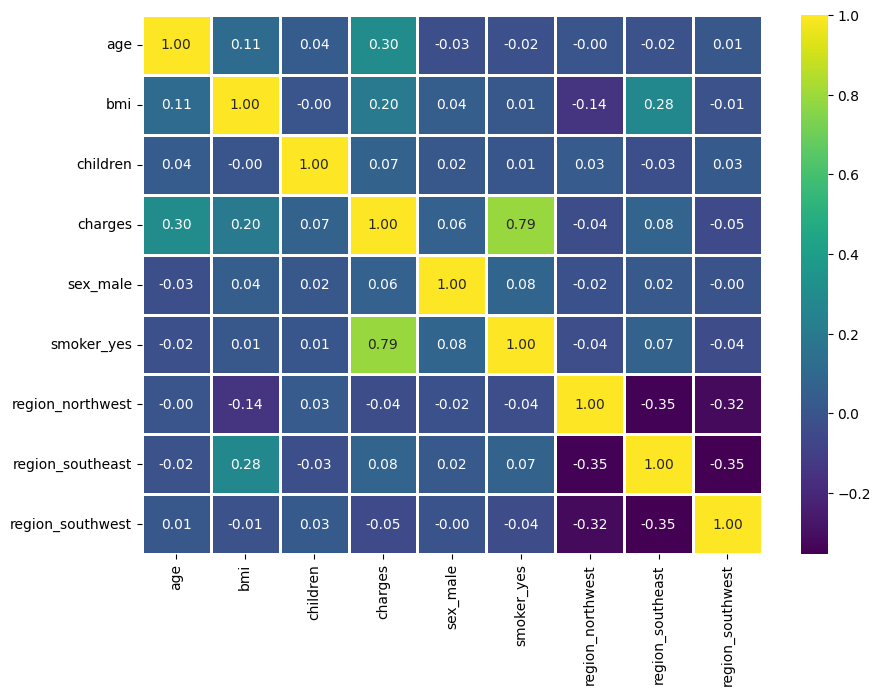

charges             1.000000
smoker_yes          0.788783
age                 0.298624
bmi                 0.199846
region_southeast    0.075652
children            0.066442
sex_male            0.062837
region_southwest    0.051686
region_northwest    0.036874
Name: charges, dtype: float64


In [47]:
# Correlation matrix
corr = data_encoded.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=2)
plt.show()


# Correlation with the target variable
corr_target = abs(corr['charges'])
print(corr_target.sort_values(ascending=False))


In [ ]:
# Pairplot for visualizing the distribution and relationships
sns.pairplot(data_encoded)
plt.show()

In [58]:
# Assuming 'data_encoded' is your DataFrame and 'charges' is your target variable
corr_matrix = data_encoded.corr()
strong_corr_features = corr_matrix[corr_matrix['charges'] > 0.5].index.drop('charges')
print("Features with strong positive correlation:", strong_corr_features.tolist())


Features with strong positive correlation: ['smoker_yes']


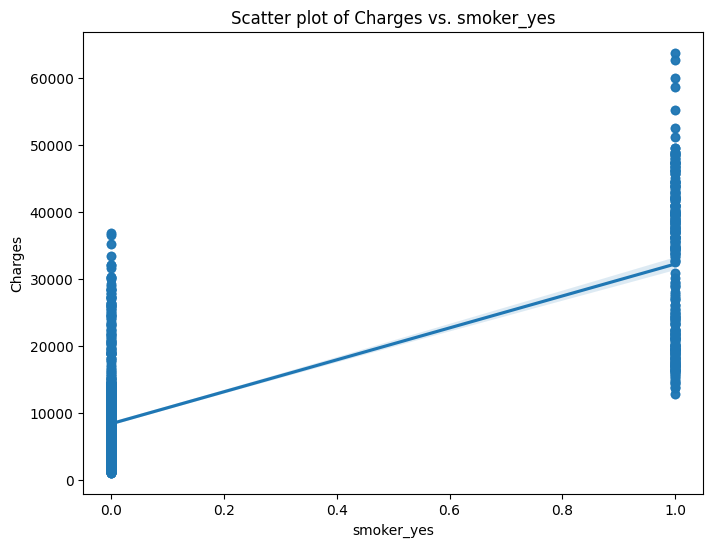

In [65]:

# Plotting
for feature in strong_corr_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data_encoded['feature'], y=data_encoded['charges'])
    plt.title(f'Scatter plot of Charges vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


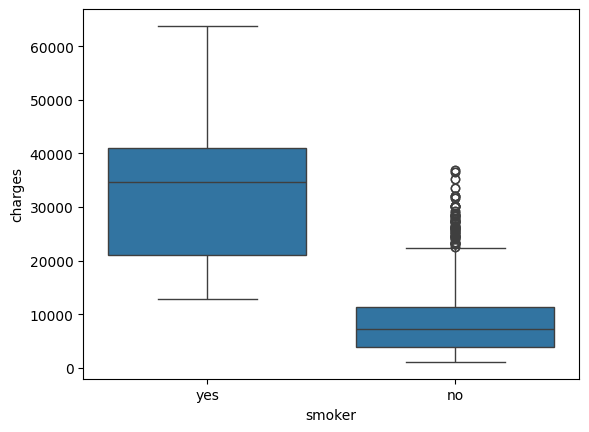

In [59]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

<Figure size 2000x1000 with 0 Axes>

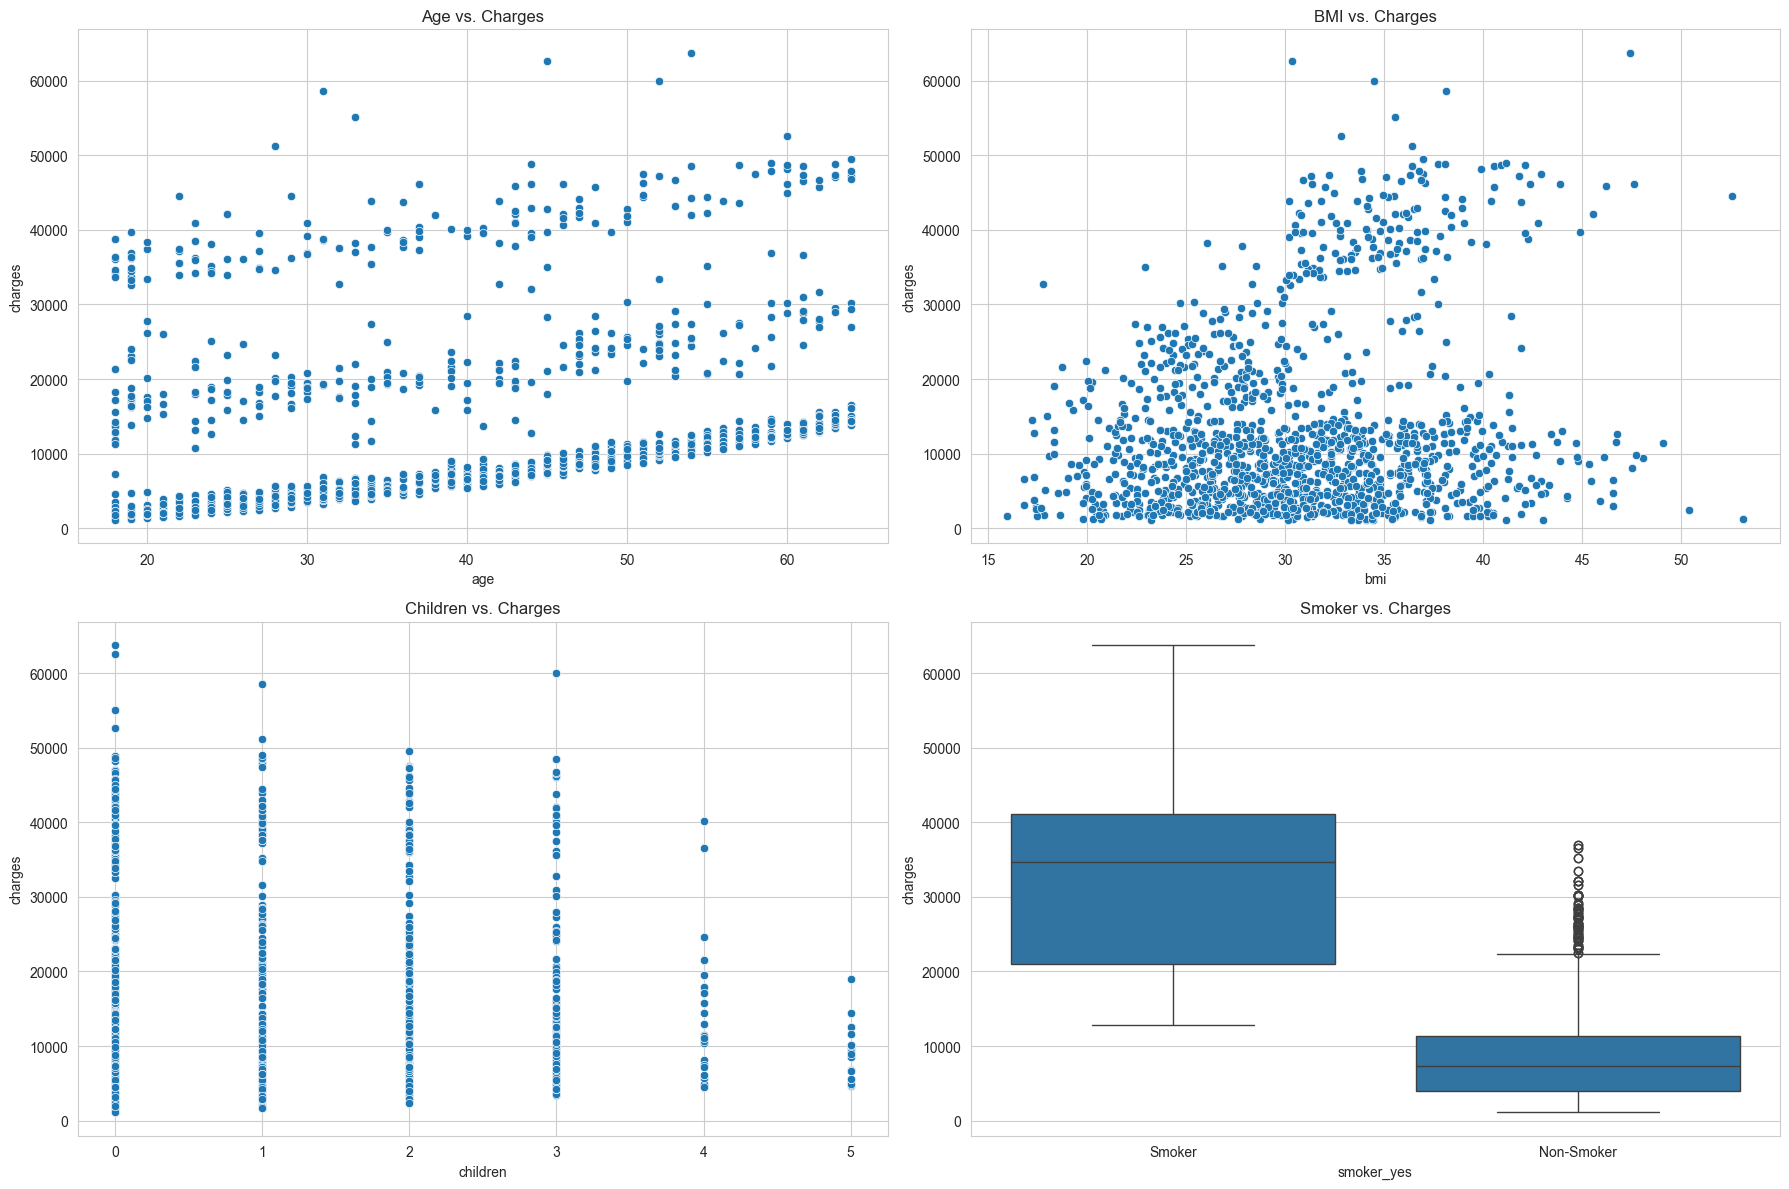

In [76]:
# Attributes that most affect the charges feature

df = data_encoded.copy()
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create a subplot structure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Scatter plot of age vs. charges
sns.scatterplot(ax=axes[0, 0], data=df, x='age', y='charges').set(title='Age vs. Charges')

# Scatter plot of bmi vs. charges
sns.scatterplot(ax=axes[0, 1], data=df, x='bmi', y='charges').set(title='BMI vs. Charges')

# Scatter plot of children vs. charges
sns.scatterplot(ax=axes[1, 0], data=df, x='children', y='charges').set(title='Children vs. Charges')

# Converting boolean columns to string for visualization purposes
df_for_plot = df.copy()
df_for_plot['sex_male'] = df_for_plot['sex_male'].map({True: 'Male', False: 'Female'})
df_for_plot['smoker_yes'] = df_for_plot['smoker_yes'].map({True: 'Smoker', False: 'Non-Smoker'})

# Box plot of smoker vs. charges
sns.boxplot(ax=axes[1, 1], data=df_for_plot, x='smoker_yes', y='charges').set(title='Smoker vs. Charges')

plt.tight_layout()
plt.show()


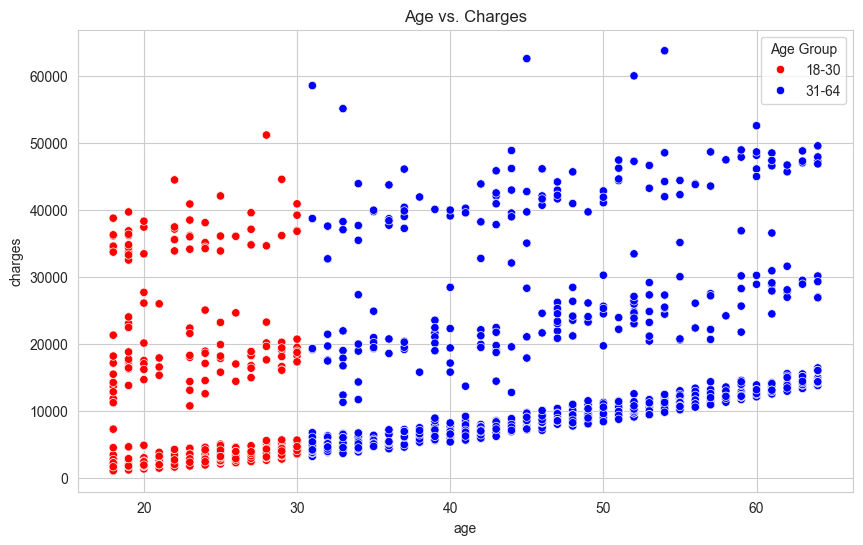

In [77]:

# Categorize ages into two groups: 18-30 and 31-64
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 64], labels=['18-30', '31-64'])

# Create a scatter plot with age vs. charges with markers colored by age group
plt.figure(figsize=(10, 6))

# Scatter plot of age vs. charges with color differentiation for age groups
sns.scatterplot(data=df, x='age', y='charges', hue='age_group', palette=['red', 'blue']).set(title='Age vs. Charges')

plt.legend(title='Age Group')
plt.show()
